# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [155]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
#from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [156]:
# Read the Mapbox API key
#load_dotenv()
mapbox_token = os.getenv("MAPBOX")

# Import Data

In [157]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_locations_df = pd.read_csv(file_path)


sfo_data

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
2010,Central Sunset,418.172493,372560,1239
2010,Corona Heights,369.359338,372560,1239
2010,Cow Hollow,569.379968,372560,1239
2010,Croker Amazon,165.645730,372560,1239


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [162]:
# Define Panel Visualization Functions
def housing_units():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    housing_units_df = sfo_data["housing_units"].groupby(sfo_data.index).mean()
    fig_housing_units = plt.figure()
    plot_housing_units = housing_units_df.plot.bar()
    plot_housing_units.set_xlabel("Year", fontsize=12)
    plot_housing_units.set_ylabel("Housing Units Per Year", fontsize=12)
    plot_housing_units.set_title("Housing Units in SanFrancisco fron 2010 to 2016", fontsize=14, fontweight="bold")

    plt.close(fig_housing_units)
    return fig_housing_units

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    average_gross_rent_df = sfo_data["gross_rent"].groupby(sfo_data.index).mean()
    fig_average_gross_rent = plt.figure()
    plot_average_gross_rent = average_gross_rent_df.plot.bar()
    plot_average_gross_rent.set_xlabel("Year", fontsize=12)
    plot_average_gross_rent.set_ylabel("Average Gross Rent in San Francisco Per Year", fontsize=12)
    plot_average_gross_rent.set_title("Average Gross Rent in San Francisco Per Year in SanFrancisco fron 2010 to 2016", fontsize=14, fontweight="bold")

    plt.close(fig_average_gross_rent)
    return pn.pane.Matplotlib(fig_average_gross_rent, tight=True)
                                      
def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    fig_sale_price_per_sqft_avg = plt.figure()
    sale_price_per_sqft_avg_df = sfo_data["sale_price_sqr_foot"].groupby(sfo_data.index).mean()
    plot_sale_price_per_sqft_avg = sale_price_per_sqft_avg_df.plot.bar()
    plot_sale_price_per_sqft_avg.set_xlabel("Year", fontsize=12)
    plot_sale_price_per_sqft_avg.set_ylabel("Average Sales Price Per Year", fontsize=12)
    plot_sale_price_per_sqft_avg.set_title("Average Sales Price Per Year in SanFrancisco from 2010 to 2016", fontsize=14, fontweight="bold")

    plt.close(fig_sale_price_per_sqft_avg)
    return pn.pane.Matplotlib(fig_sale_price_per_sqft_avg, tight=True)
                                      
def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    avg_prices_by_neighborhood_df = sfo_data.groupby(['year','neighborhood']).mean()
    fig_avg_price_by_neighborhood = plt.figure()
    plot_avg_price_by_neighborhood = avg_prices_by_neighborhood_df.plot.bar()
    plot_avg_price_by_neighborhood.set_xlabel("Year", fontsize=12)
    plot_avg_price_by_neighborhood.set_ylabel("Average Prices by Neighborhood", fontsize=12)
    plot_avg_price_by_neighborhood.set_title("Average Prices by Neighborhoods in SanFrancisco fron 2010 to 2016", 
                                          fontsize=14, fontweight="bold")

    plt.close(fig_avg_price_by_neighborhood)
    return pn.pane.Matplotlib(fig_avg_price_by_neighborhood, tight=True)
                                      
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    # YOUR CODE HERE!
    top_most_expensive_neighborhoods_df = sfo_data["sale_price_sqr_foot"].groupby(sfo_data.index).mean()
    fig_top_most_expensive_neighborhoods = plt.figure()
    plot_top_most_expensive_neighborhoods = top_most_expensive_neighborhoods_df.plot.bar()
    plot_top_most_expensive_neighborhoods.set_xlabel("Year", fontsize=12)
    plot_top_most_expensive_neighborhoods.set_ylabel("Top 10 Most Expensive Neighborhoods", fontsize=12)
    plot_top_most_expensive_neighborhoods.set_title("Top 10 Most Exoensive Neighborhoods in SanFrancisco fron 2010 to 2016", 
                                            fontsize=14, fontweight="bold")

    plt.close(fig_top_most_expensive_neighborhoods)
    return pn.pane.Matplotlib(fig_top_most_expensive_neighborhoods, tight=True)
                                      
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    # YOUR CODE HERE!
    top_most_expensive_neighborhoods_df = sfo_data["sale_price_sqr_foot"].groupby(sfo_data.index).mean()
    pc1  = px.parallel_coordinates(top_most_expensive_neighborhoods_df, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno,)
    return pc1                   

def parallel_categories():
    """Parallel Categories Plot."""

    # YOUR CODE HERE!
    top_most_expensive_neighborhoods_df = sfo_data["sale_price_sqr_foot"].groupby(sfo_data.index).mean()
    pc = px.parallel_categories(top_most_expensive_neighborhoods_df, color="sale_price_sqr_foot", color_continuous_scale=px.colors.sequential.Inferno,)
    return pc
def neighborhood_map():
    """Neighborhood Map"""
    
    # YOUR CODE HERE!
    px.set_mapbox_access_token(mapbox_token)
    all_neighborhoods_df = sfo_data.groupby(by="neighborhood").mean()
    all_neighborhoods_df.reset_index(inplace=True)
    all_neighborhoods_df.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
    all_neighborhood_locations_df = pd.merge(neighborhood_locations_df, all_neighborhoods_df, on="Neighborhood")
    
    #need to do a scatter map and return it
    all_neighborhoods = px.scatter_mapbox(all_neighborhood_locations_df, 
                                                lat="Lat", lon="Lon", 
                                                color="Neighborhood",
                                                 width=800,
                                                 height=500,
                                                 mapbox_style="open-street-map")
    return all_neighborhoods

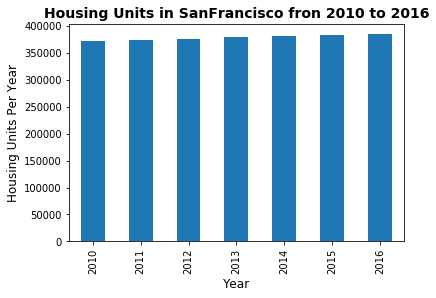

In [163]:
housing_units()


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Matplotlib(Figure, tight=True)
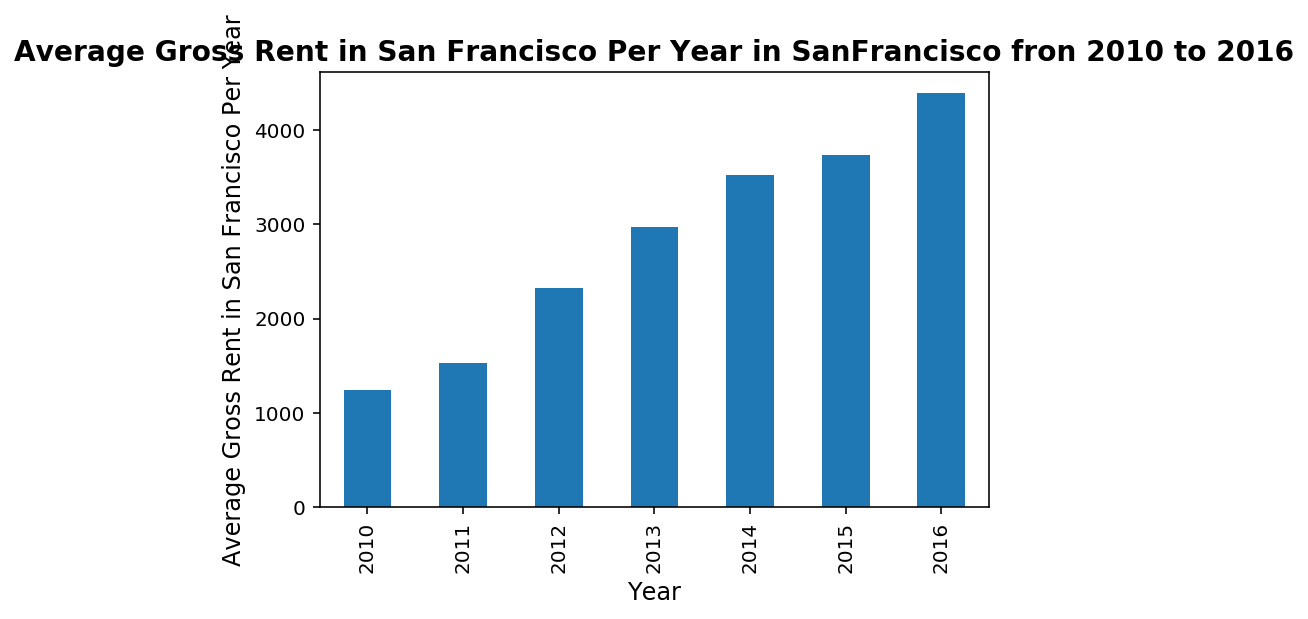

In [166]:
average_gross_rent()

Matplotlib(Figure, tight=True)
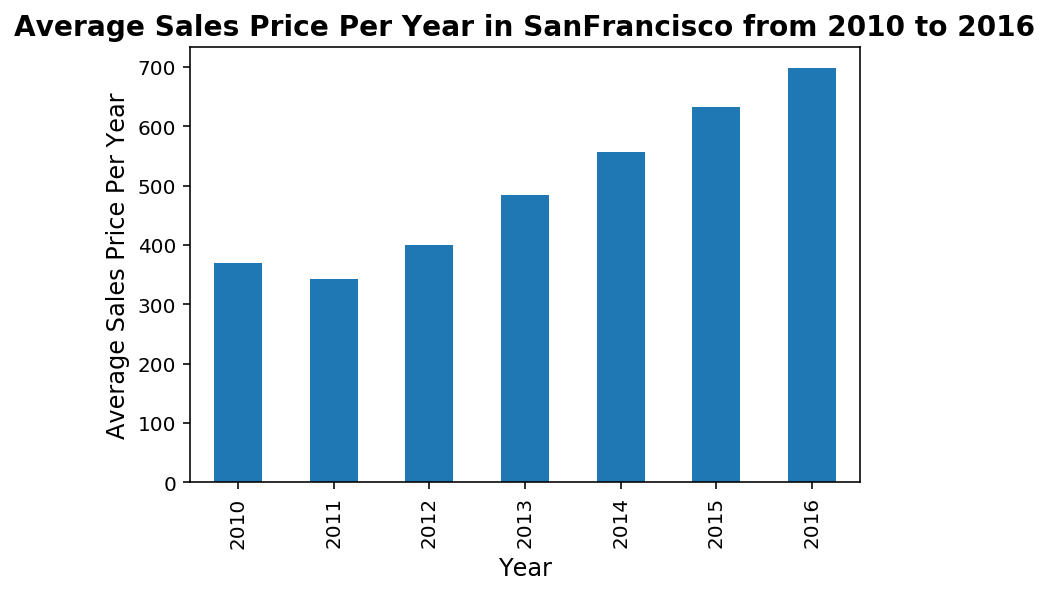

In [167]:
average_sales_price()

Matplotlib(Figure, tight=True)
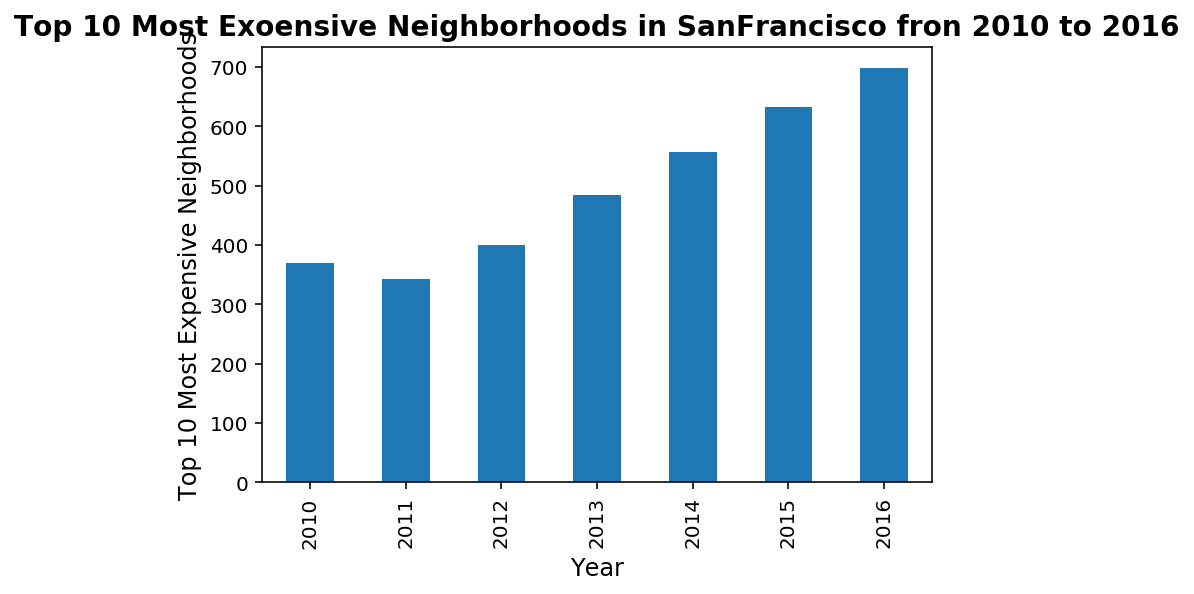

In [168]:
top_most_expensive_neighborhoods()

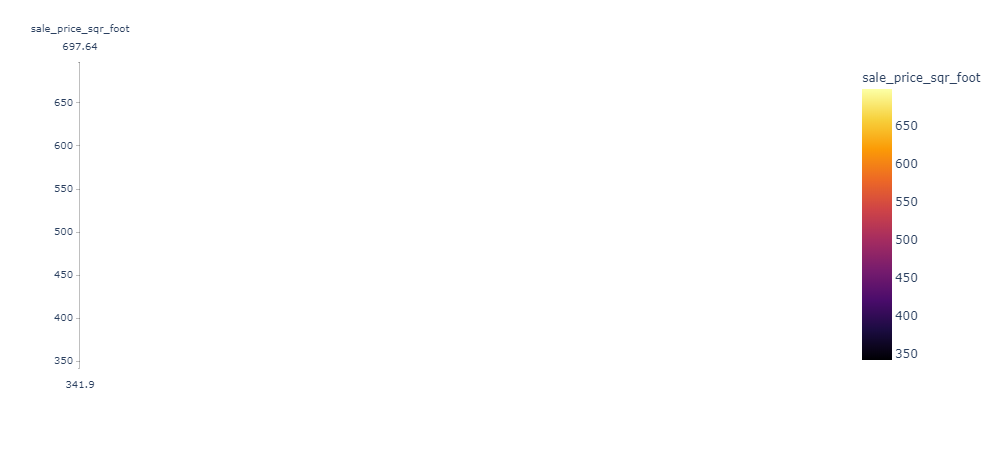

In [169]:
parallel_coordinates()

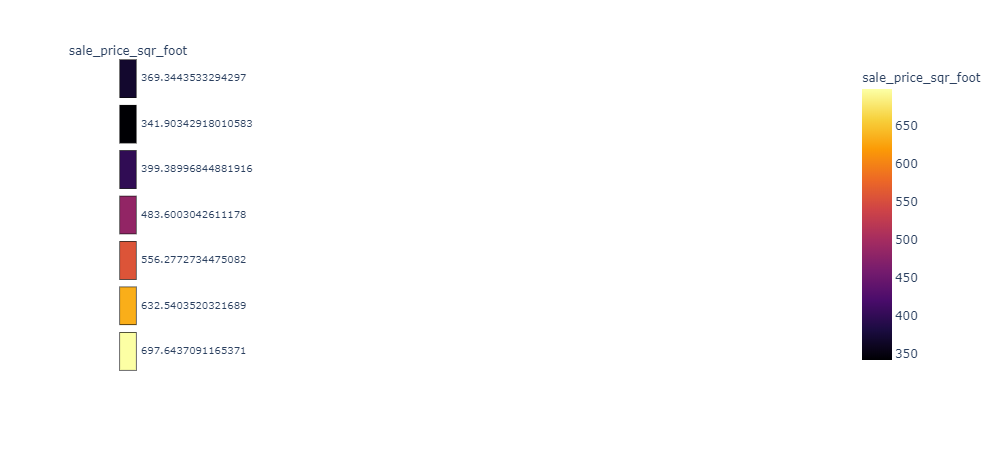

In [170]:
parallel_categories()

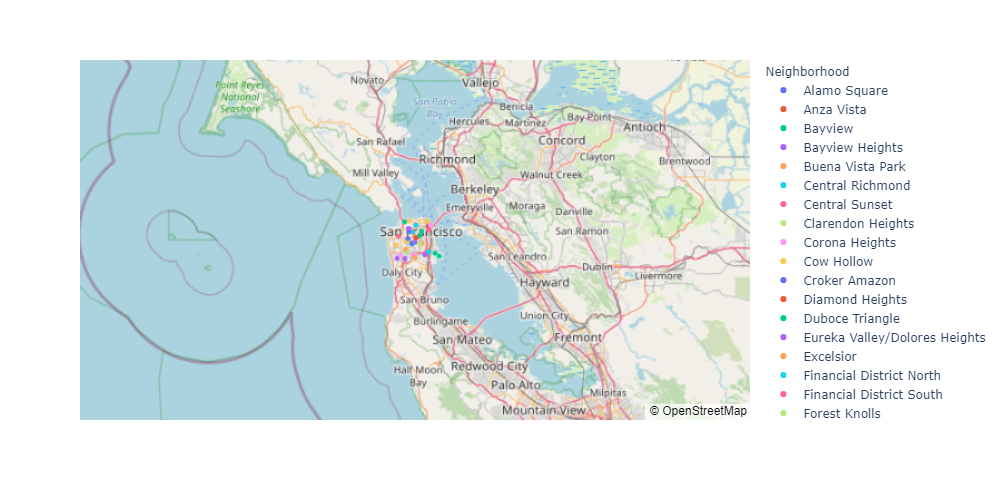

In [171]:
neighborhood_map()

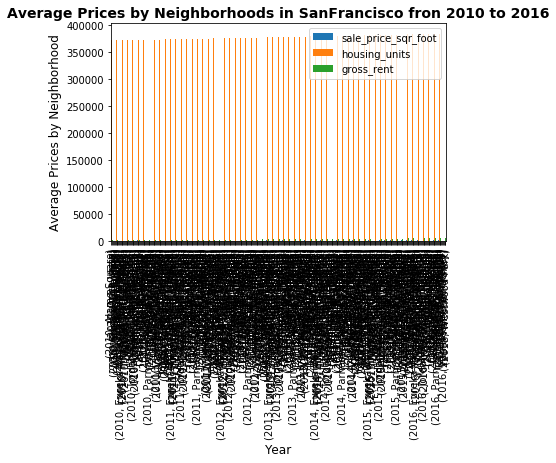

In [164]:
# YOUR CODE HERE!
title = pn.pane.Markdown("""Real Estate Market Analysis of SanFrancisco from 2010 to 2016""", width=800)
welcome = pn.pane.Markdown(
"""This dashboard is a visual analysis of historical prices of housing units, per square foot prices, as well as gross rent in SanFrancisco 
from 2010 to 2016.  Explore the detaiils using your mouse to click through the tabs for more details about a six year period 
of the real estate market in the City by the Bay - shortly after the great recession.""")

tabs = pn.Tabs(
        ("Welcome", pn.Column(welcome, neighborhood_map())), 
        ("Yearly Market Analysis", pn.Row(housing_units(), average_gross_rent(), average_sales_price())),
        ("Neighborhood Analysis", pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods())),
        ("Parallel Plot Analysis", pn.Column(parallel_coordinates(), parallel_categories(), width=960)))
               
#panel = pn.Column(pn.Row(title), tabs, width=900)

In [ ]:
# I printed out each individual tab.  Simon and Miguel had problems getting the tabs to work properly

## Serve the Panel Dashboard

Column(width=900)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs(active=1)
        [0] Column
            [0] Markdown(str)
            [1] Str(None)
        [1] Row
            [0] Str(None)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
        [3] Column(width=960)
            [0] Plotly(Figure)
            [1] Plotly(Figure)
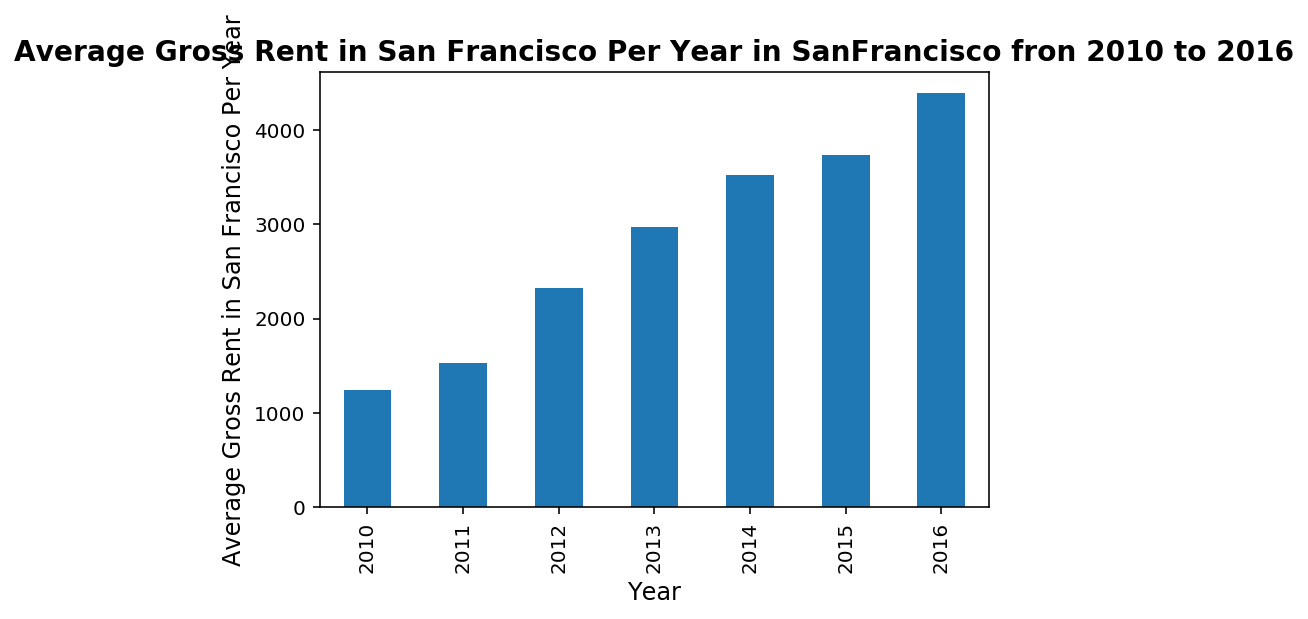
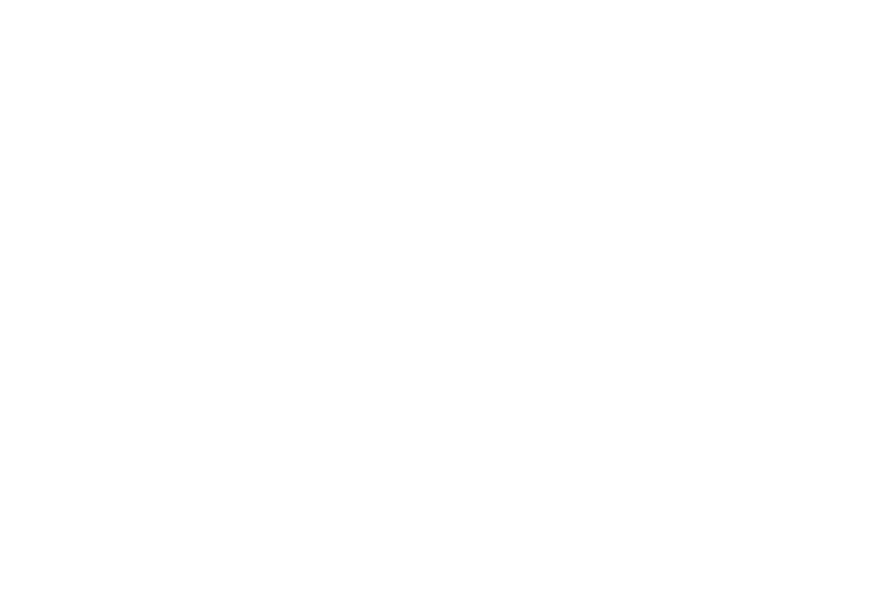
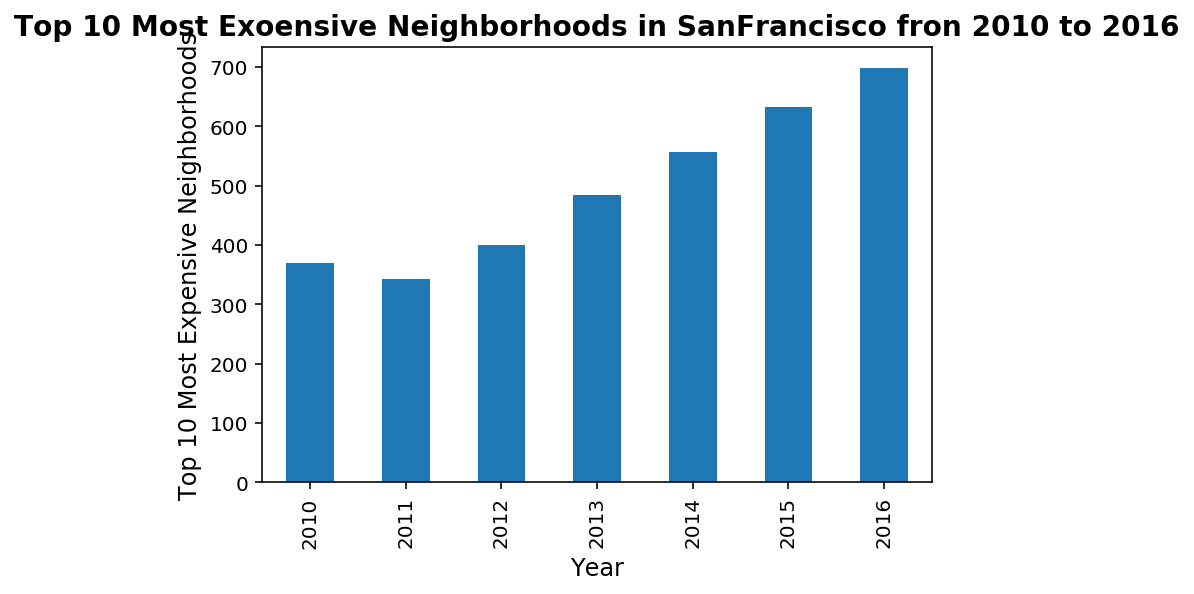
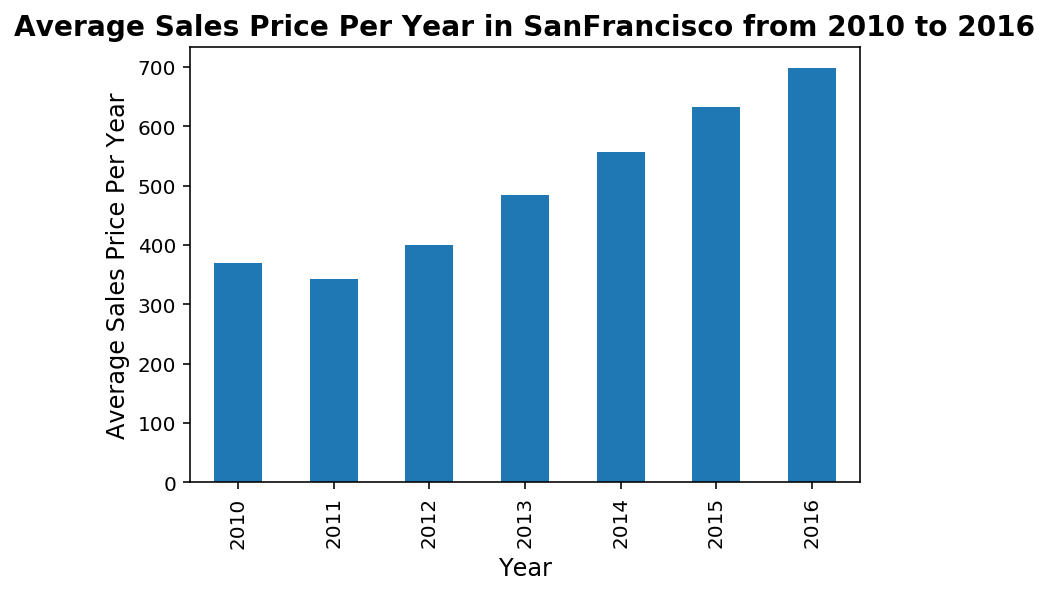

In [165]:
panel.servable()